<a href="https://colab.research.google.com/github/adityakangune/IT-LP-4-Codes-/blob/main/Chit_4_CIFAR10_CNN_LP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chit 4**

### *Name:Aditya Kangune*
### *Roll number: 43321*
### *Batch: P11*

*Problem Statement*:

    Implement the CNN model for classifying CIFAR10 image dataset by dividing the model into following 4 stages:
    a.	Loading and preprocessing the image data
    b.	Defining the model's architecture
    c.	Training the model
    d.	Estimating the model's performance



## a.	Import the necessary packages


In [ ]:
import tensorflow as tf

# Display the version
print(tf.__version__)	

# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model


2.9.2


## b.	Load the training and testing data 


In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()


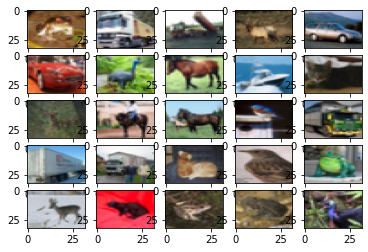

In [ ]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()


## c.	Define the network architecture using Keras 


In [ ]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16

In [ ]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(lr = 0.1, decay=1e-6, momentum=0.9, nesterov=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# Compile
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## d.	Train the model using SGD/Adam optimizer


In [ ]:
# Fit
history = model.fit(
x_train, y_train, validation_data=(x_test, y_test), epochs=50)


Epoch 1/50
1563/1563 [==============================] - 20s 7ms/step - loss: 2.6368 - accuracy: 0.1020 - val_loss: 2.3122 - val_accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 15s 9ms/step - loss: 2.3092 - accuracy: 0.0994 - val_loss: 2.3126 - val_accuracy: 0.1000
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3096 - accuracy: 0.1009 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3092 - accuracy: 0.1008 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3146 - accuracy: 0.1002 - val_loss: 2.3088 - val_accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3093 - accuracy: 0.0999 - val_loss: 2.3058 - val_accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3093 - accuracy: 0.0967 - val_loss: 2.3064 - val_ac

## e.	Evaluate the network

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 2.3063 - accuracy: 0.1000
Test Loss: 2.306286573410034, Test Accuracy: 0.10000000149011612


  ## f.	Plot the training loss and accuracy

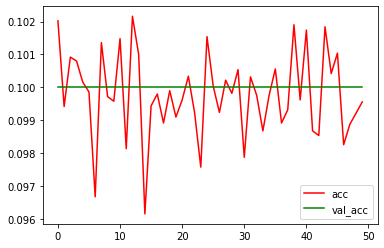

In [ ]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc', color='red')
plt.plot(history.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


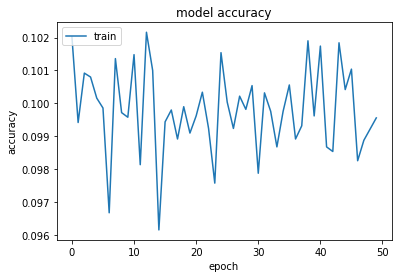

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


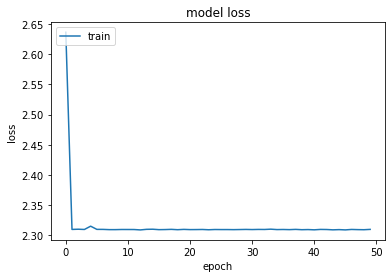

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()